# HIỂN THỊ DANH SÁCH CÁC ẢNH CỦA TẬP DỮ LIỆU

1. Yêu cầu chung: Hiển thị một số ảnh trong bộ dữ liệu theo từng phân loại
  + Ví dụ minh họa:
  <IMG SRC = 'https://editor.analyticsvidhya.com/uploads/762161_OSvbuPLy0PSM2nZ62SbtlQ.png'>
2. Yêu cầu cụ thể:
  - Input: tập tin .csv, trong đó mỗi dòng tương ứng với (đường dẫn) một ảnh và categoryID. Ví dụ tập tin CarDataset-Splits-1-Train.csv
  - Output: như hình minh họa ở trên, mỗi dòng tương ứng với một CategoryID, số lượng ảnh, kích thước ảnh là các tham số với giá trị mặc định như sau
    + NumImgsPerRow = 10
    + ImgHeight = ImgWidth = 150
  - Các ảnh mỗi dòng được chọn ngẫu nhiên ở mỗi lần chạy

3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline:

4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.

## **Thông tin của tác giả, ngày cập nhật**

<hr>

**Thành viên nhóm**:
- **Trần Đình Khánh Đăng - 22520195**
- **Tăng Nhất - 22521027**
- **Lê Minh Nhựt - 22521060**

**Ngày cập nhật**: 16/12/2024

## Import thư viện cần thiết

In [7]:
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from tqdm import tqdm

## Mount Drive Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir = './drive/MyDrive/Classroom/CS114.ML - MACHINE LEARNING CS114.P11 - HK1 (2024-2025)/Final Project/Public'
dataset_dir = './drive/MyDrive/Classroom/CS114.ML - MACHINE LEARNING CS114.P11 - HK1 (2024-2025)/Final Project/Dataset'

categories = ['Others', 'Honda', 'Hyundai', 'KIA', 'Mazda', 'Mitsubishi', 'Suzuki', 'Toyota', 'VinFast']

def get_indexing(categories):
    indexing = {brand: idx for idx, brand in enumerate(categories)}
    invert_indexing = {idx: brand for brand, idx in indexing.items()}
    return indexing, invert_indexing

indexing, invert_indexing = get_indexing(categories)

In [10]:
def display_images(csv_file='CarDataset-Splits-1-Train.csv',
                   base_dir='./',
                   dataset_dir='./',
                   num_imgs_per_row=10,
                   img_height=150,
                   img_width=150,):
    # Đọc file CSV
    csv_path = os.path.join(dataset_dir, csv_file)
    df = pd.read_csv(csv_path)

    # Lấy danh sách các CategoryID
    categories = df['CategoryID'].unique()

    # Thiết lập vùng visualize/Điều chỉnh figsize cho phù hợp với số lượng ảnh
    fig_height = len(categories) * (img_height / 100)
    fig_width = num_imgs_per_row * (img_width / 100)
    plt.figure(figsize=(fig_height, fig_width))

    for i, category in enumerate(tqdm(categories, desc="Displaying images")):
        # Lấy ảnh thuộc category hiện tại
        category_imgs = df[df['CategoryID'] == category]['ImageFullPath'].tolist()

        # Chọn ngẫu nhiên ảnh
        selected_imgs = random.sample(category_imgs, min(len(category_imgs), num_imgs_per_row))

        # Tạo subplot cho CategoryID (đặt nó ở cột đầu tiên mỗi hàng)
        ax = plt.subplot(len(categories), num_imgs_per_row + 1, i * (num_imgs_per_row + 1) + 1)
        ax.text(0.5, 0.5, invert_indexing[category],
                ha='center', va='center', fontsize=12, fontweight='bold')
        ax.axis("off")

        # Hiển thị các ảnh trong hàng
        for j, img_path in enumerate(selected_imgs):
            ax = plt.subplot(len(categories), num_imgs_per_row + 1, i * (num_imgs_per_row + 1) + j + 2)
            try:
                img = Image.open(os.path.join(base_dir, img_path))
                img = img.resize((img_width, img_height))
                ax.imshow(img)
                ax.axis("off")
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                ax.axis("off")

    # Điều chỉnh layout
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.tight_layout()
    plt.show()


Displaying images: 100%|██████████| 9/9 [00:42<00:00,  4.73s/it]


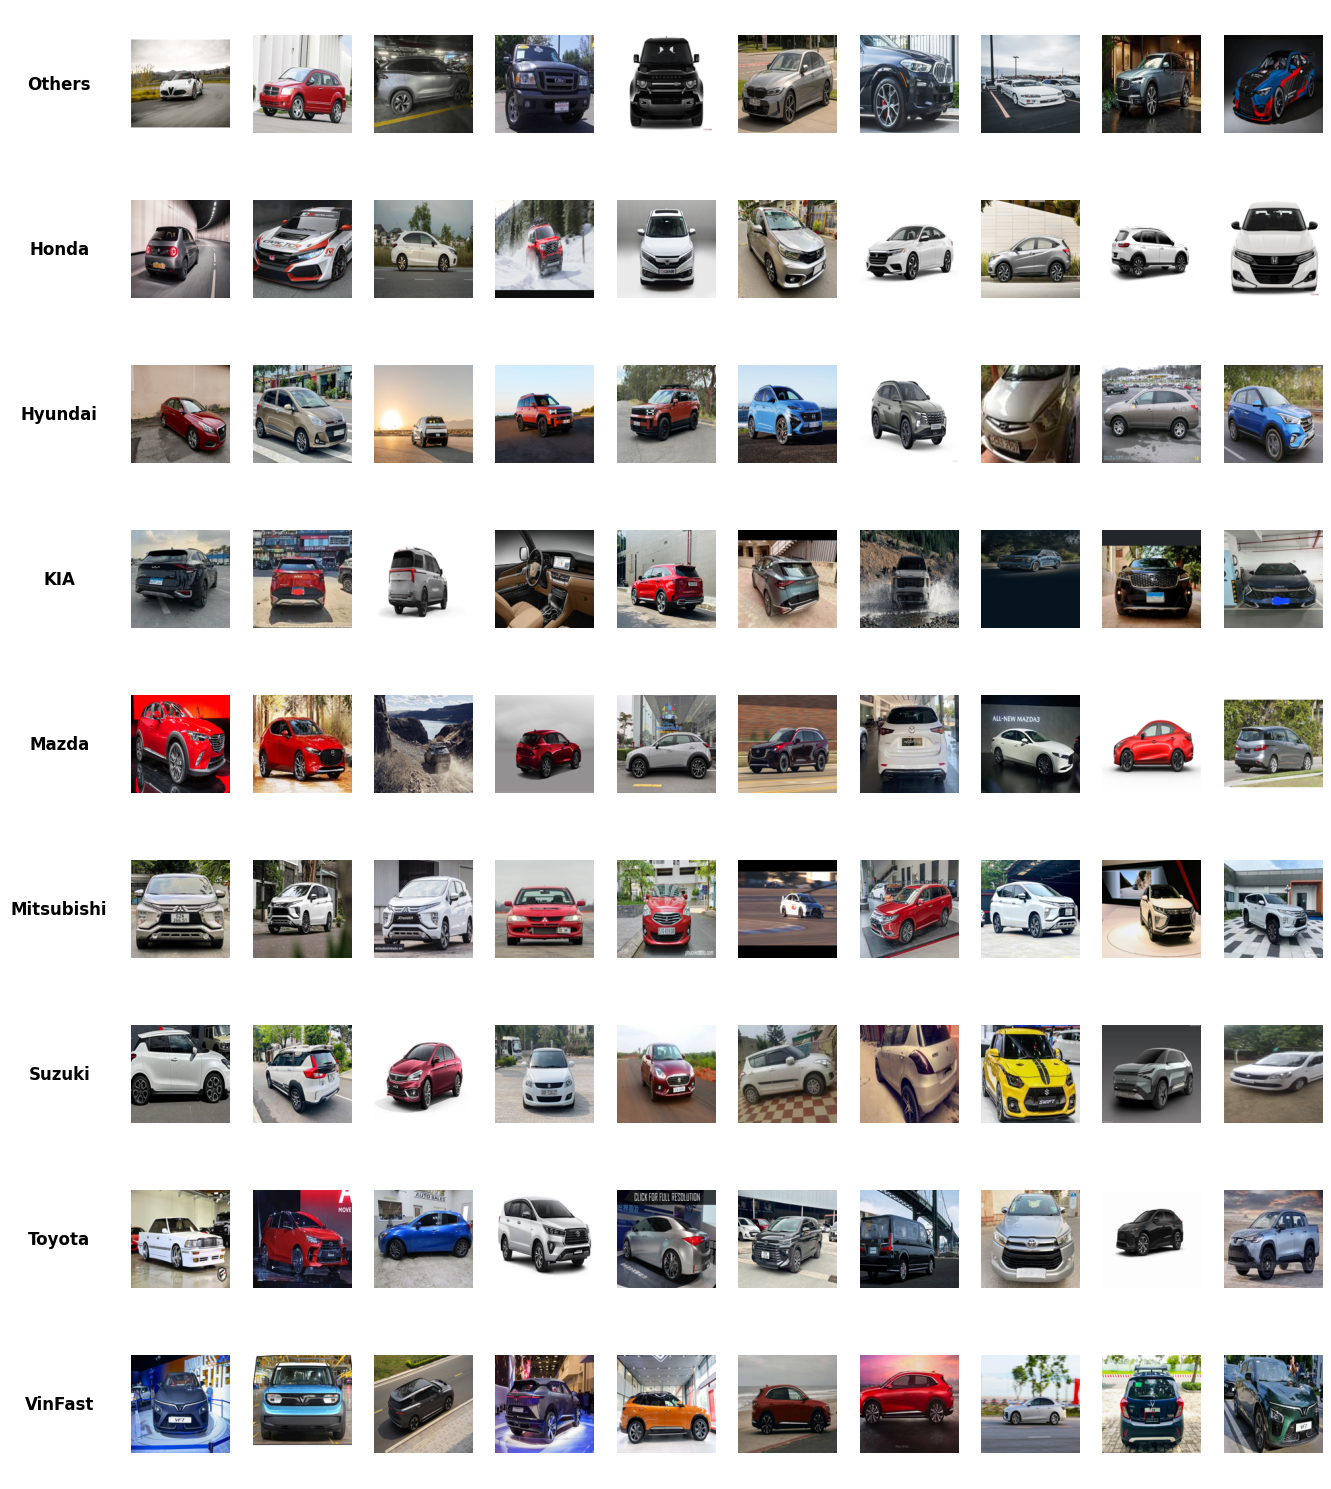

In [11]:
display_images(csv_file='CarDataset-Splits-1-Train.csv', base_dir=base_dir, dataset_dir=dataset_dir, num_imgs_per_row=10, img_height=150, img_width=150)